In [56]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from gatspy.periodic import LombScargleMultiband, LombScargleMultibandFast

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

%matplotlib inline

In [2]:
meta_data = pd.read_csv('../input/training_set_metadata.csv')

In [3]:
train_series = pd.read_csv('../input/training_set.csv')

In [4]:
train_series.describe()

object_id           mjd      passband          flux      flux_err  \
count  1.421705e+06  1.421705e+06  1.421705e+06  1.421705e+06  1.421705e+06   
mean   3.392608e+07  6.017921e+04  2.783108e+00  2.468855e+01  2.548932e+01   
std    4.258439e+07  3.092379e+02  1.703946e+00  3.684506e+03  3.814492e+03   
min    6.150000e+02  5.958003e+04  0.000000e+00 -1.149388e+06  4.637530e-01   
25%    1.843400e+05  5.989905e+04  1.000000e+00 -2.789418e+00  2.118670e+00   
50%    4.548783e+06  6.019331e+04  3.000000e+00  7.331990e-01  4.708105e+00   
75%    6.796280e+07  6.048722e+04  4.000000e+00  8.830932e+00  1.297371e+01   
max    1.307798e+08  6.067436e+04  5.000000e+00  2.432809e+06  2.234069e+06   

           detected  
count  1.421705e+06  
mean   1.666168e-01  
std    3.726336e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [6]:
train_series.head(20)

object_id         mjd  passband         flux   flux_err  detected
0         615  59750.4229         2  -544.810303   3.622952         1
1         615  59750.4306         1  -816.434326   5.553370         1
2         615  59750.4383         3  -471.385529   3.801213         1
3         615  59750.4450         4  -388.984985  11.395031         1
4         615  59752.4070         2  -681.858887   4.041204         1
5         615  59752.4147         1 -1061.457031   6.472994         1
6         615  59752.4224         3  -524.954590   3.552751         1
7         615  59752.4334         4  -393.480225   3.599346         1
8         615  59752.4435         5  -355.886780  10.421921         1
9         615  59767.2968         2  -548.013550   3.462291         1
10        615  59767.3045         1  -815.188599   5.293019         1
11        615  59767.3122         3  -475.516052   3.340643         1
12        615  59767.3233         4  -405.663818   3.496113         1
13        615  59767.3343         5  -421.199066   6.377517         1
14        615  59770.2179         2  -554.903198   3.927843         1
15        615  59770.2256         1  -820.042786   5.875329         1
16        615  59770.2334         3  -477.004730   3.736262         1
17        615  59770.2445         4  -400.270386   3.834955         1
18        615  59770.2557         5  -415.286896   7.435979         1
19        615  59779.3188         2  -630.523682   4.333287         1

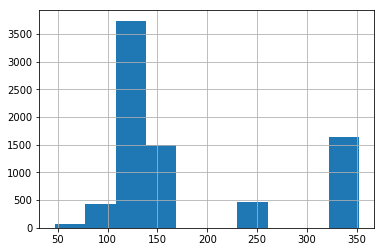

In [12]:
train_series.groupby('object_id').count().flux.hist()

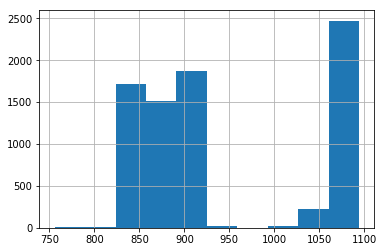

In [113]:
(train_series.groupby('object_id').mjd.max() - train_series.groupby('object_id').mjd.min()).hist()

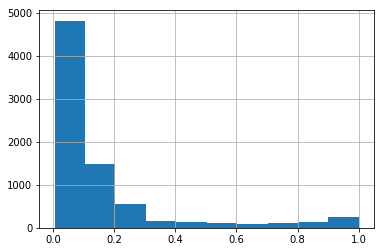

In [14]:
train_series.groupby('object_id').mean().detected.hist()

In [88]:
train_series.passband.unique()

array([2, 1, 3, 4, 5, 0])

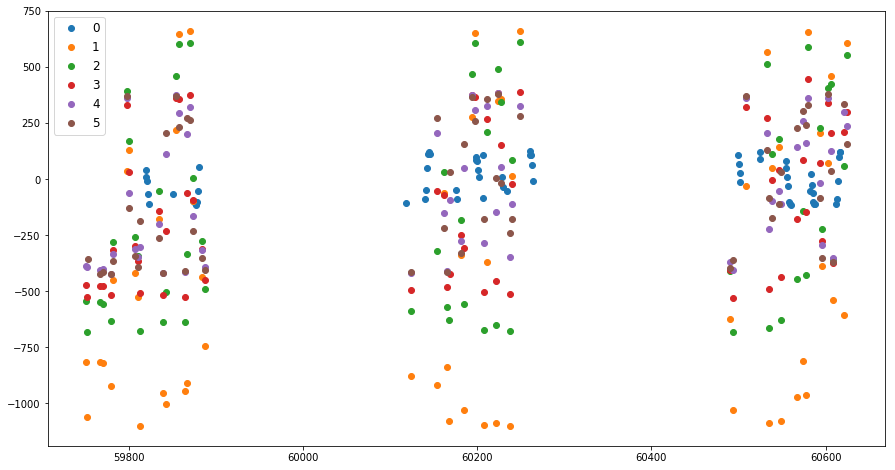

In [101]:
plt.figure(figsize=(15, 8))
for band in sorted(train_series.passband.unique()):
    plt.plot(train_series[train_series.object_id == 615][train_series.passband == band].mjd,
             train_series[train_series.object_id == 615][train_series.passband == band].flux, 'o', label=band)
plt.legend(fontsize=12)

In [49]:
train_series.object_id.unique().shape

(7848,)

In [58]:
o615 = train_series[train_series.object_id == 615]

In [109]:
%%time
model = LombScargleMultiband(fit_period=True)

model.optimizer.period_range = (0.1, int((o615.mjd.max() - o615.mjd.min())/ 2))

model.fit(o615.mjd, o615.flux, o615.flux_err, o615.passband)

Finding optimal frequency:
 - Estimated peak width = 0.00719
 - Using 5 steps per peak; omega_step = 0.00144
 - User-specified period range:  0.1 to 4.4e+02
 - Computing periods at 43681 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
CPU times: user 1min 26s, sys: 2min 39s, total: 4min 6s
Wall time: 20.8 s


In [102]:
model.best_period # 8時間周期っていうこと　すごすぎ

0.32449928791353233

In [104]:
(train_series.mjd / model.best_period) % 1 # 周期で割ると位相になる

0          0.137187
1          0.160916
2          0.184645
3          0.205292
4          0.251530
5          0.275259
6          0.298988
7          0.332887
8          0.364011
9          0.136993
10         0.160722
11         0.184451
12         0.218658
13         0.252556
14         0.138862
15         0.162591
16         0.186628
17         0.220834
18         0.255349
19         0.184840
20         0.208569
21         0.232298
22         0.266196
23         0.300095
24         0.032009
25         0.055738
26         0.079467
27         0.113674
28         0.148188
29         0.554145
             ...   
1421675    0.802415
1421676    0.101042
1421677    0.759755
1421678    0.939731
1421679    0.145004
1421680    0.295704
1421681    0.499101
1421682    0.426688
1421683    0.684958
1421684    0.826728
1421685    0.873576
1421686    0.536470
1421687    0.153762
1421688    0.161833
1421689    0.320238
1421690    0.797287
1421691    0.477423
1421692    0.838608
1421693    0.166229


In [105]:
train_series.mjd

0          59750.4229
1          59750.4306
2          59750.4383
3          59750.4450
4          59752.4070
5          59752.4147
6          59752.4224
7          59752.4334
8          59752.4435
9          59767.2968
10         59767.3045
11         59767.3122
12         59767.3233
13         59767.3343
14         59770.2179
15         59770.2256
16         59770.2334
17         59770.2445
18         59770.2557
19         59779.3188
20         59779.3265
21         59779.3342
22         59779.3452
23         59779.3562
24         59782.1897
25         59782.1974
26         59782.2051
27         59782.2162
28         59782.2274
29         59797.2861
              ...    
1421675    60464.2127
1421676    60466.2566
1421677    60490.1588
1421678    60491.1907
1421679    60496.1248
1421680    60497.1472
1421681    60498.1867
1421682    60499.1367
1421683    60503.1145
1421684    60505.1075
1421685    60506.0962
1421686    60510.2053
1421687    60515.2731
1421688    60524.0372
1421689   

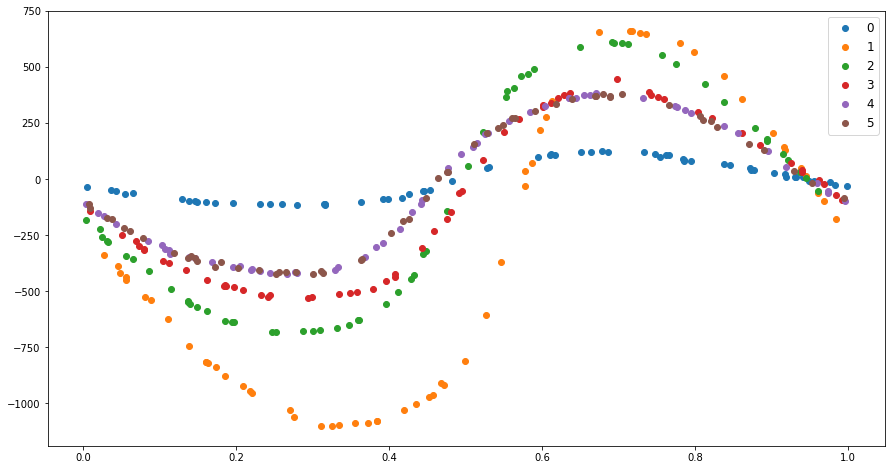

In [106]:
plt.figure(figsize=(15, 8))
for band in sorted(train_series.passband.unique()):
    plt.plot((train_series[train_series.object_id == 615][train_series.passband == band].mjd / model.best_period) % 1,
             train_series[train_series.object_id == 615][train_series.passband == band].flux, 'o', label=band)
plt.legend(fontsize=12)

In [107]:
7840*20/3600

43.55555555555556

In [110]:
%%time
model = LombScargleMultiband(fit_period=True)

model.optimizer.period_range = (0.2, int((o615.mjd.max() - o615.mjd.min())/ 2))

model.fit(o615.mjd, o615.flux, o615.flux_err, o615.passband)

Finding optimal frequency:
 - Estimated peak width = 0.00719
 - Using 5 steps per peak; omega_step = 0.00144
 - User-specified period range:  0.2 to 4.4e+02
 - Computing periods at 21836 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
CPU times: user 42.2 s, sys: 1min 17s, total: 1min 59s
Wall time: 10 s


In [116]:
%%time
model = LombScargleMultiband(fit_period=True)

model.optimizer.period_range = (0.2, 360)

model.fit(o615.mjd, o615.flux, o615.flux_err, o615.passband)

Finding optimal frequency:
 - Estimated peak width = 0.00719
 - Using 5 steps per peak; omega_step = 0.00144
 - User-specified period range:  0.2 to 3.6e+02
 - Computing periods at 21834 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
CPU times: user 43.5 s, sys: 1min 18s, total: 2min 1s
Wall time: 10.2 s


In [117]:
model.best_period

0.3244993976872123

In [118]:
%%time
model = LombScargleMultibandFast(fit_period=True)

model.optimizer.period_range = (0.2, 360)

model.fit(o615.mjd, o615.flux, o615.flux_err, o615.passband)

Finding optimal frequency:
 - Estimated peak width = 0.00719
 - Using 5 steps per peak; omega_step = 0.00144
 - User-specified period range:  0.2 to 3.6e+02
 - Computing periods at 21834 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
CPU times: user 323 ms, sys: 238 ms, total: 561 ms
Wall time: 236 ms


In [119]:
model.best_period

0.3244991566687874

In [126]:
%%time
model.score(model.best_period)

CPU times: user 1.45 ms, sys: 0 ns, total: 1.45 ms
Wall time: 1 ms


array(0.95399139)

In [120]:
0.23 * 7800 / 3600

0.49833333333333335

In [123]:
3492890 * 0.23 / 3600

223.15686111111114

In [128]:
period_df = pd.DataFrame({
    "object_id": train_series.object_id.unique(),
    "best_period": np.zeros(train_series.object_id.unique().shape[0]),
    "score":np.zeros(train_series.object_id.unique().shape[0])
})

In [138]:
period_df

object_id  best_period  score
0           615          0.0    0.0
1           713          0.0    0.0
2           730          0.0    0.0
3           745          0.0    0.0
4          1124          0.0    0.0
5          1227          0.0    0.0
6          1598          0.0    0.0
7          1632          0.0    0.0
8          1920          0.0    0.0
9          1926          0.0    0.0
10         2072          0.0    0.0
11         2103          0.0    0.0
12         2300          0.0    0.0
13         2330          0.0    0.0
14         2624          0.0    0.0
15         2677          0.0    0.0
16         2922          0.0    0.0
17         3041          0.0    0.0
18         3285          0.0    0.0
19         3423          0.0    0.0
20         3489          0.0    0.0
21         3910          0.0    0.0
22         4088          0.0    0.0
23         4132          0.0    0.0
24         4171          0.0    0.0
25         4173          0.0    0.0
26         4220          0.0    0.0
27         4389          0.0    0.0
28         4595          0.0    0.0
29         4819          0.0    0.0
...         ...          ...    ...
7818  130219752          0.0    0.0
7819  130231675          0.0    0.0
7820  130263372          0.0    0.0
7821  130312781          0.0    0.0
7822  130319749          0.0    0.0
7823  130330088          0.0    0.0
7824  130359176          0.0    0.0
7825  130375489          0.0    0.0
7826  130386135          0.0    0.0
7827  130402542          0.0    0.0
7828  130408188          0.0    0.0
7829  130414189          0.0    0.0
7830  130489916          0.0    0.0
7831  130552230          0.0    0.0
7832  130595291          0.0    0.0
7833  130617044          0.0    0.0
7834  130622528          0.0    0.0
7835  130639669          0.0    0.0
7836  130659834          0.0    0.0
7837  130678775          0.0    0.0
7838  130684460          0.0    0.0
7839  130695262          0.0    0.0
7840  130698059          0.0    0.0
7841  130716752          0.0    0.0
7842  130727624          0.0    0.0
7843  130739978          0.0    0.0
7844  130755807          0.0    0.0
7845  130762946          0.0    0.0
7846  130772921          0.0    0.0
7847  130779836          0.0    0.0

[7848 rows x 3 columns]

In [136]:
def fit_period(object_group):
    model = LombScargleMultibandFast(fit_period=True)

    model.optimizer.period_range = (0.2, 360)

    model.fit(object_group.mjd, object_group.flux, object_group.flux_err, object_group.passband)
    
    return model.best_period, model.score(model.best_period)

In [140]:
bp, score = fit_period(train_series[train_series.object_id == 713])

Finding optimal frequency:
 - Estimated peak width = 0.0074
 - Using 5 steps per peak; omega_step = 0.00148
 - User-specified period range:  0.2 to 3.6e+02
 - Computing periods at 21210 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


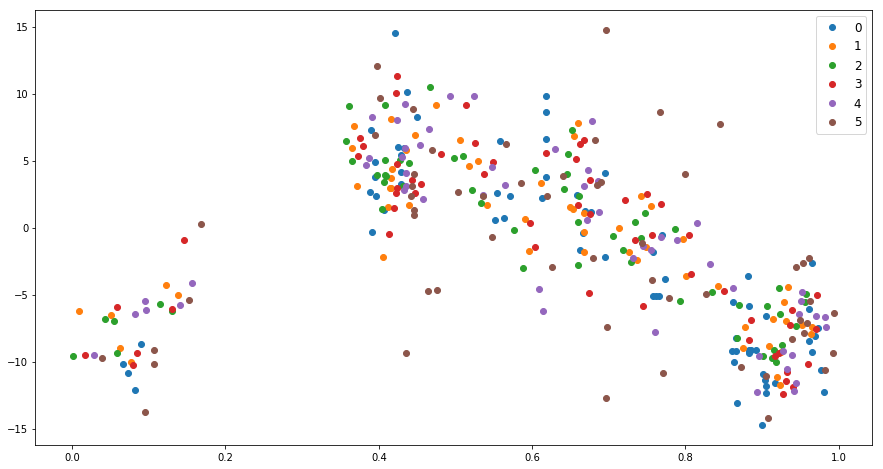

In [141]:
plt.figure(figsize=(15, 8))
for band in sorted(train_series.passband.unique()):
    plt.plot((train_series[train_series.object_id == 713][train_series.passband == band].mjd / bp) % 1,
             train_series[train_series.object_id == 713][train_series.passband == band].flux, 'o', label=band)
plt.legend(fontsize=12)

In [150]:
period_df.loc[1, 'best_period'] = bp

In [158]:
period_df.loc[0].object_id

615.0

In [153]:
period_df.index

RangeIndex(start=0, stop=7848, step=1)

In [165]:
%%time
%%capture
for i in period_df.index:
    bp, score = fit_period(train_series[train_series.object_id == period_df.loc[i].object_id])
    period_df.loc[i, 'best_period'] = bp
    period_df.loc[i, 'score'] = score
    

CPU times: user 1h 10min 21s, sys: 1h 13min 4s, total: 2h 23min 26s
Wall time: 39min 30s


In [167]:
period_df.to_csv("../proccesed-data/train_periods.csv")

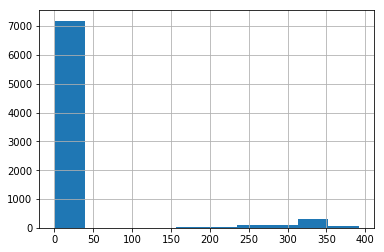

In [171]:
period_df.best_period.hist(bins=10)

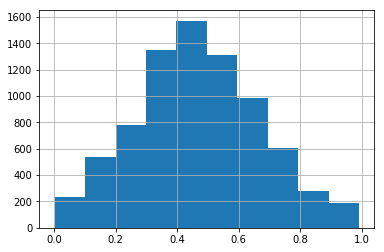

In [172]:
period_df.score.hist()